# Multi-Free Field Analysis Example using DAPI

This example shows how to run OpenSeesMP in DesignSafe from a jupyter notebook using the DesignSafe API (dapi).

A set of four 1D profiles is analyzed using OpenSeesMP.

<img src = "multi-freeField.png"  height="400" width="400" align = "center">

# Setup DAPI and start OpenSeesMP job

In [24]:
# Dapi installation
!pip uninstall dapi --yes

# Install the latest development version of dapi from GitHub
!pip install git+https://github.com/DesignSafe-CI/dapi.git@dev --user --quiet

# Install editable local version of dapi
# !pip install -e ../

Found existing installation: dapi 0.3.0
Uninstalling dapi-0.3.0:
  Successfully uninstalled dapi-0.3.0


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
import os

sys.path.append(os.path.join(os.getcwd(), "./DS_input"))

from plotAcc import plot_acc

### Setup job description

In [3]:
# Import DAPI and other required libraries
from dapi import DSClient
import os
import json
from datetime import date

In [4]:
try:
    ds = DSClient()
except Exception as e:
    print(f"Authentication failed: {e}")
    raise SystemExit("Stopping notebook due to authentication failure.")

Authentication successful.
DatabaseAccessor initialized. Connections will be created on first access.


In [5]:
ds_path = "/home/jupyter/MyData/template-notebooks/tapis3/opensees/OpenSeesMP_multiMotion/DS_input"
print(f"DesignSafe path: {ds_path}")
input_uri = ds.files.translate_path_to_uri(ds_path)
print(f"Input URI: {input_uri}")

DesignSafe path: /home/jupyter/MyData/template-notebooks/tapis3/opensees/OpenSeesMP_multiMotion/DS_input
Translated '/home/jupyter/MyData/template-notebooks/tapis3/opensees/OpenSeesMP_multiMotion/DS_input' to 'tapis://designsafe.storage.default/kks32/template-notebooks/tapis3/opensees/OpenSeesMP_multiMotion/DS_input' using t.username
Input URI: tapis://designsafe.storage.default/kks32/template-notebooks/tapis3/opensees/OpenSeesMP_multiMotion/DS_input


In [6]:
# Job configuration parameters
jobname: str = "opensees-MP-multiMotion-dapi"
app_id: str = "opensees-mp-s3"
input_filename: str = "Main_multiMotion.tcl"
control_exec_Dir: str = "DS_input"  # Folder with files including input_filename
tacc_allocation: str = "ASC25049"  # MUST USE YOUR OWN ALLOCATION !!
archive_system: str = "designsafe"
control_nodeCount: int = 1
control_corespernode: int = 16
max_job_minutes: int = 60

In [7]:
# Generate job request dictionary using app defaults
job_dict = ds.jobs.generate_request(
    app_id=app_id,
    input_dir_uri=input_uri,
    script_filename=input_filename,
    archive_system=archive_system,
    max_minutes=max_job_minutes,
    allocation=tacc_allocation,
)

Generating job request for app 'opensees-mp-s3'...
Using App Details: opensees-mp-s3 vlatest
Placing script 'Main_multiMotion.tcl' in appArgs: 'Main Script'
Adding allocation: ASC25049
Job request dictionary generated successfully.


In [8]:
# Customize job settings
job_dict["name"] = jobname
job_dict["nodeCount"] = control_nodeCount
job_dict["coresPerNode"] = control_corespernode

print("Generated job request:")
print(json.dumps(job_dict, indent=2, default=str))

Generated job request:
{
  "name": "opensees-MP-multiMotion-dapi",
  "appId": "opensees-mp-s3",
  "appVersion": "latest",
  "description": "Runs all the processors in parallel. Requires understanding of parallel processing and the capabilities to write parallel scripts.",
  "execSystemId": "stampede3",
  "archiveSystemId": "designsafe.storage.default",
  "archiveSystemDir": "${EffectiveUserId}/tapis-jobs-archive/${JobCreateDate}/${JobUUID}",
  "archiveOnAppError": true,
  "execSystemLogicalQueue": "skx",
  "nodeCount": 1,
  "coresPerNode": 16,
  "maxMinutes": 60,
  "memoryMB": 192000,
  "isMpi": false,
  "tags": [],
  "fileInputs": [
    {
      "name": "Input Directory",
      "sourceUrl": "tapis://designsafe.storage.default/kks32/template-notebooks/tapis3/opensees/OpenSeesMP_multiMotion/DS_input",
      "autoMountLocal": true,
      "targetPath": "inputDirectory"
    }
  ],
  "parameterSet": {
    "appArgs": [
      {
        "name": "Main Script",
        "arg": "Main_multiMotion.tc

### Run job

In [9]:
# Submit job using dapi
submitted_job = ds.jobs.submit_request(job_dict)
print(f"Job launched with UUID: {submitted_job.uuid}")
print(
    "Can also check in DesignSafe portal under - Workspace > Tools & Application > Job Status"
)


--- Submitting Tapis Job Request ---
{
  "name": "opensees-MP-multiMotion-dapi",
  "appId": "opensees-mp-s3",
  "appVersion": "latest",
  "description": "Runs all the processors in parallel. Requires understanding of parallel processing and the capabilities to write parallel scripts.",
  "execSystemId": "stampede3",
  "archiveSystemId": "designsafe.storage.default",
  "archiveSystemDir": "${EffectiveUserId}/tapis-jobs-archive/${JobCreateDate}/${JobUUID}",
  "archiveOnAppError": true,
  "execSystemLogicalQueue": "skx",
  "nodeCount": 1,
  "coresPerNode": 16,
  "maxMinutes": 60,
  "memoryMB": 192000,
  "isMpi": false,
  "tags": [],
  "fileInputs": [
    {
      "name": "Input Directory",
      "sourceUrl": "tapis://designsafe.storage.default/kks32/template-notebooks/tapis3/opensees/OpenSeesMP_multiMotion/DS_input",
      "autoMountLocal": true,
      "targetPath": "inputDirectory"
    }
  ],
  "parameterSet": {
    "appArgs": [
      {
        "name": "Main Script",
        "arg": "Main

In [10]:
# Monitor job status using dapi
final_status = submitted_job.monitor(interval=60)
print(f"Job finished with status: {final_status}")

# Interpret job status
ds.jobs.interpret_status(final_status, submitted_job.uuid)

# Display runtime summary
submitted_job.print_runtime_summary(verbose=False)


Monitoring Job: 414da416-817a-48db-a70a-0fa79b6bc348-007


Waiting for job to start: 0 checks [00:00, ? checks/s]

Monitoring job:   0%|                                                   | 0/60 [00:00<?, ? checks/s]

	Status: ARCHIVING
	Status: FINISHED
Job finished with status: FINISHED
Job 414da416-817a-48db-a70a-0fa79b6bc348-007 completed successfully.

Runtime Summary
---------------
QUEUED  time: 00:03:58
RUNNING time: 00:00:00
TOTAL   time: 00:06:13
---------------


# Postprocess Results

### Identify job and archived location

In [11]:
# Get archive information using dapi
archive_uri = submitted_job.archive_uri
print(f"Archive URI: {archive_uri}")

# List archive contents
archive_files = ds.files.list(archive_uri)
print("\nArchive contents:")
for item in archive_files:
    print(f"- {item.name} ({item.type})")

Archive URI: tapis://designsafe.storage.default/kks32/tapis-jobs-archive/2025-06-06Z/414da416-817a-48db-a70a-0fa79b6bc348-007
Listing files in system 'designsafe.storage.default' at path 'kks32/tapis-jobs-archive/2025-06-06Z/414da416-817a-48db-a70a-0fa79b6bc348-007'...
Found 6 items.

Archive contents:
- inputDirectory (dir)
- opensees.zip (file)
- tapisjob.env (file)
- tapisjob.out (file)
- tapisjob.sh (file)
- tapisjob_app.sh (file)


### Go to archived folder

In [12]:
# Download the inputDirectory folder which contains results
input_dir_archive_uri = f"{archive_uri}/inputDirectory"
try:
    # List contents of inputDirectory in archive
    input_dir_files = ds.files.list(input_dir_archive_uri)
    print("\nFiles in inputDirectory:")
    for item in input_dir_files:
        print(f"- {item.name} ({item.type})")

except Exception as e:
    print(f"Error accessing archive: {e}")

Listing files in system 'designsafe.storage.default' at path 'kks32/tapis-jobs-archive/2025-06-06Z/414da416-817a-48db-a70a-0fa79b6bc348-007/inputDirectory'...
Found 28 items.

Files in inputDirectory:
- .ipynb_checkpoints (dir)
- __pycache__ (dir)
- Main_multiMotion.tcl (file)
- motion1.vel (file)
- motion2.vel (file)
- plotAcc.py (file)
- ProfileA.tcl (file)
- ProfileA_accmotion1.out (file)
- ProfileA_accmotion2.out (file)
- ProfileA_Gstressmotion1.out (file)
- ProfileA_Gstressmotion2.out (file)
- ProfileB.tcl (file)
- ProfileB_accmotion1.out (file)
- ProfileB_accmotion2.out (file)
- ProfileB_Gstressmotion1.out (file)
- ProfileB_Gstressmotion2.out (file)
- ProfileC.tcl (file)
- ProfileC_accmotion1.out (file)
- ProfileC_accmotion2.out (file)
- ProfileC_Gstressmotion1.out (file)
- ProfileC_Gstressmotion2.out (file)
- ProfileD.tcl (file)
- ProfileD_accmotion1.out (file)
- ProfileD_accmotion2.out (file)
- ProfileD_Gstressmotion1.out (file)
- ProfileD_Gstressmotion2.out (file)
- recordData

### Plot acceleration response spectra

Plot acceleration response spectra on log-linear scale

In [13]:
# Get DesignSafe Jupyter path
archive_path = ds.files.translate_uri_to_path(input_dir_archive_uri)
print(archive_path)

/home/jupyter/MyData/tapis-jobs-archive/2025-06-06Z/414da416-817a-48db-a70a-0fa79b6bc348-007/inputDirectory


In [14]:
os.chdir(archive_path)

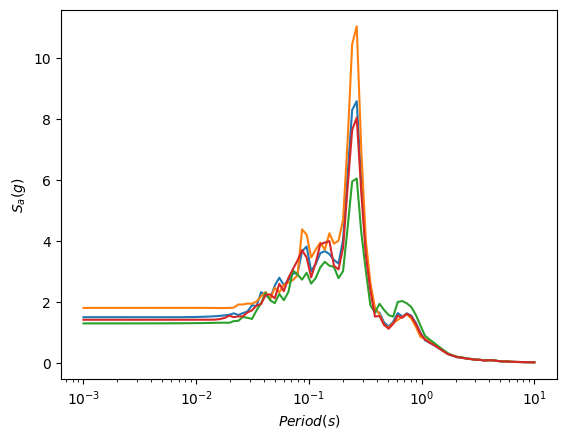

In [15]:
plot_acc()